# Minimum Square Error method

In [152]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
from scipy import linalg as sla
sy.init_printing()
%matplotlib inline

In [153]:
xs=np.array([0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0])
ys=np.array([2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0])
size=len(xs)
x=sy.symbols('x')

In [181]:
n=10
base=[x**k for k in range(n)]
fs=[np.vectorize(sy.Lambda(x,base[k].subs({x:x}))) for k in range(n)]

In [182]:
phi=sy.Matrix([[np.dot(fs[i](xs), fs[j](xs)) for i in range(n)] for j in range(n)])

In [183]:
b=np.array([np.dot(ys,fs[i](xs))  for i in range(n)])
b

array([19.6100000000000, 19.289999999999999, 27.4428000000000,
       43.7709600000000, 73.9736160000000, 129.494736000000,
       232.319902080000, 424.628390016000, 787.705159449600,
       1478.97815892480], dtype=object)

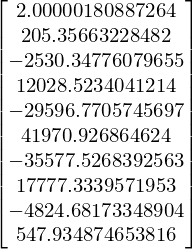

In [184]:
a=phi.solve(b)
a

In [187]:
poly=sum([a[k] * base[k] for k in range(n)])
poly=sy.Lambda(x,poly.subs({x:x}))

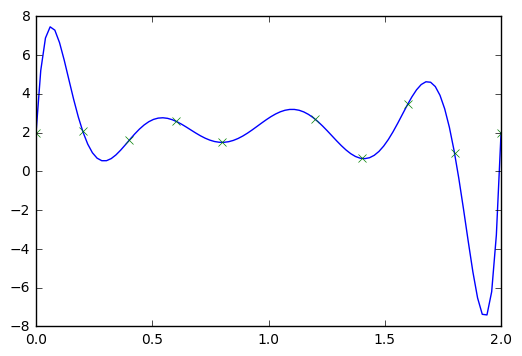

In [188]:
xplt=np.linspace(0,2,100)
yplt=np.vectorize(poly)(xplt)
plt.plot(xplt,yplt)
plt.plot(xs,ys,'gx')

In [205]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
sy.init_printing()
%matplotlib inline

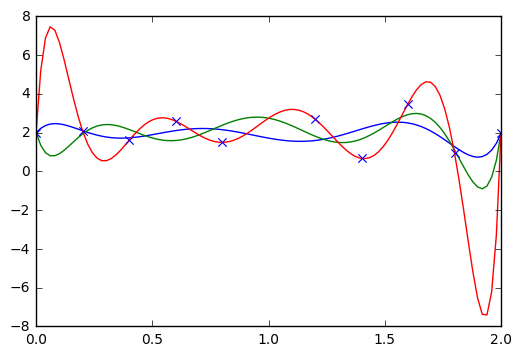

In [213]:
xs=np.array([0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0])
ys=np.array([2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0])
x=sy.symbols('x')
def approx(n):
    base=[x**k for k in range(n)]
    fs=[np.vectorize(sy.Lambda(x,base[k].subs({x:x}))) for k in range(n)]
    phi=sy.Matrix([[np.dot(fs[i](xs), fs[j](xs)) for i in range(n)] for j in range(n)])
    b=np.array([np.dot(ys,fs[i](xs))  for i in range(n)])
    a=phi.solve(b)
    poly=sum([a[k] * base[k] for k in range(n)])
    poly=sy.Lambda(x,poly.subs({x:x}))
    return poly

for n in range(8,11):
    poly=approx(n)
    xplt=np.linspace(0,2,100)
    yplt=np.vectorize(poly)(xplt)
    plt.plot(xplt,yplt)
    plt.ylim(-8.0,8.0)
    plt.plot(xs,ys,'bx')